In [1]:
import pandas as pd

import numpy as np

from unidecode import unidecode

import seaborn as sns
import matplotlib.pyplot as plt

import joblib

import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix

import sklearn.metrics as metrics

from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from keras.layers import Embedding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.layers import LSTM
import tensorflow as tf

import json

import warnings

warnings.filterwarnings('ignore')

In [2]:
def cmatrix(model):

    y_pred = model.predict(X_test)

    cmatrix = confusion_matrix(Y_test, y_pred)

    print(cmatrix)

    sns.heatmap(cmatrix,fmt='d',cmap='BuPu',annot=True)

    plt.xlabel('Predicted Values')

    plt.ylabel('Actual Values')

    plt.title('Confusion Matrix')

In [3]:
train = pd.read_excel('../Data/train.xlsx')
train.dropna(inplace=True)
train['data_type'] = 'train'

validation = pd.read_excel('../Data/validation.xlsx')
validation.dropna(inplace=True)
validation['data_type'] = 'validation'

test = pd.read_excel('../Data/test.xlsx')
test.dropna(inplace=True)
test['data_type'] = 'test'

df = pd.concat([train, test, validation])

In [4]:
print(train.shape)
print(test.shape)
print(validation.shape)
print(df.shape)

(39472, 3)
(57205, 3)
(9868, 3)
(106545, 3)


In [5]:
train['d_gender'] = (train['gender']=='male').astype('int64')
test['d_gender'] = (test['gender']=='male').astype('int64')
validation['d_gender'] = (validation['gender']=='male').astype('int64')

In [6]:
X_train =list(train['name'])
Y_train = list(train['d_gender'])

X_validation = list(validation['name'])
Y_validation = list(validation['d_gender'])

X_test =list(test['name'])
Y_test = list(test['d_gender'])

In [7]:
train

,name,gender,data_type,d_gender
0,NARYIS,female,train,0
1,NOEMI ISABEL,female,train,0
2,SOUFIANE,male,train,1
3,ASTOU,female,train,0
4,ESTELLE,female,train,0
...,...,...,...,...
39467,ANTONIO CASIMIRO,male,train,1
39468,ROCIO CECILIA,female,train,0
39469,ROI,male,train,1
39470,HANS MICHAEL,male,train,1


In [8]:
cv=CountVectorizer(analyzer='char')

cv.fit(df['name'])

joblib.dump(cv, '../Modelos/vectorizer.joblib')

X_train=cv.transform(X_train).toarray()
X_test=cv.transform(X_test).toarray()
X_validation = cv.transform(X_validation).toarray()

In [9]:
X_train.shape

(39472, 72)

In [10]:
X_test.shape

(57205, 72)

<h2> Regresión logística </h2>

In [11]:
LR_model= LogisticRegression()

LR_model.fit(X_train,Y_train)

LR_y_pred = LR_model.predict(X_test)

0.7771523468228302
              precision    recall  f1-score   support

           0       0.91      0.72      0.81     36668
           1       0.64      0.88      0.74     20537

    accuracy                           0.78     57205
   macro avg       0.78      0.80      0.77     57205
weighted avg       0.81      0.78      0.78     57205

[[26430 10238]
 [ 2510 18027]]
None


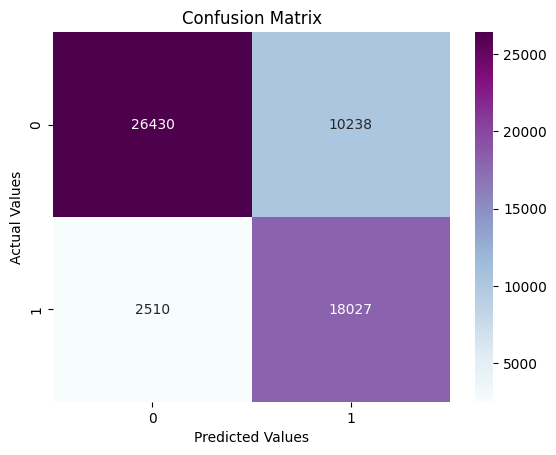

In [12]:
print(metrics.accuracy_score(LR_y_pred,Y_test))

print(metrics.classification_report(Y_test, LR_y_pred))

print(cmatrix(LR_model))

In [13]:
with open('../Modelos/V1/LR_V1.pkl','wb') as f:
    pickle.dump(LR_model,f)

<h2> Bayesiano ingenuo </h2>

In [14]:
NB_model= MultinomialNB()

NB_model.fit(X_train, Y_train)

NB_y_pred = NB_model.predict(X_test)

0.812866008216065
              precision    recall  f1-score   support

           0       0.89      0.81      0.85     36668
           1       0.70      0.82      0.76     20537

    accuracy                           0.81     57205
   macro avg       0.80      0.82      0.80     57205
weighted avg       0.82      0.81      0.82     57205

[[29583  7085]
 [ 3620 16917]]
None


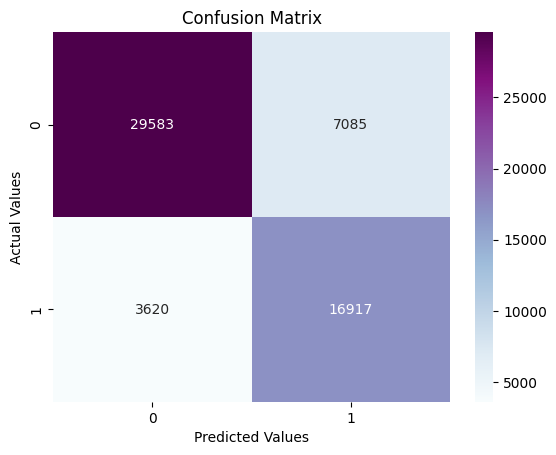

In [15]:
print(metrics.accuracy_score(NB_y_pred,Y_test))

print(metrics.classification_report(Y_test, NB_y_pred))

print(cmatrix(NB_model))

In [16]:
with open('../Modelos/V1/NB_V1.pkl','wb') as f:
    pickle.dump(NB_model,f)

<h2> XGBOOST </h2>

In [17]:
XGB_model = XGBClassifier(use_label_encoder= False)

XGB_model.fit(X_train, Y_train)

XGB_y_pred = XGB_model.predict(X_test)

0.8705183113364217
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     36668
           1       0.76      0.93      0.84     20537

    accuracy                           0.87     57205
   macro avg       0.86      0.88      0.86     57205
weighted avg       0.88      0.87      0.87     57205

[[30788  5880]
 [ 1527 19010]]
None


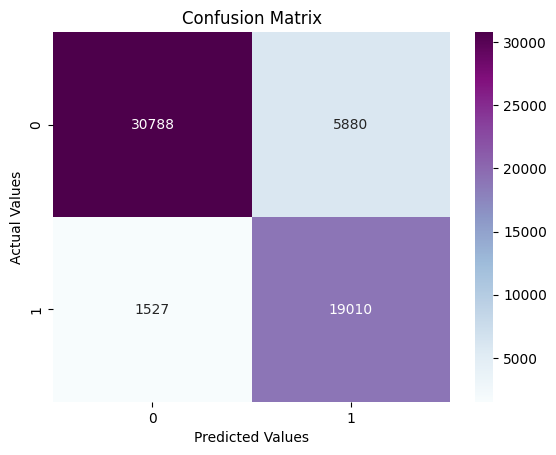

In [18]:
print(metrics.accuracy_score(XGB_y_pred,Y_test))

print(metrics.classification_report(Y_test, XGB_y_pred))

print(cmatrix(XGB_model))

In [19]:
with open('../Modelos/V1/XGB_V1.pkl','wb') as f:
    pickle.dump(XGB_model,f)

<h2> LSTM </h2>

In [32]:
voc_size = X_train.shape[0]

LSTM_model = Sequential()

LSTM_model.add(Embedding(voc_size,40,input_length=1))

LSTM_model.add(Dropout(0.3))

LSTM_model.add(LSTM(100))

LSTM_model.add(Dropout(0.3))

LSTM_model.add(Dense(64,activation='relu'))

LSTM_model.add(Dropout(0.3))

LSTM_model.add(Dense(1,activation='sigmoid'))

LSTM_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(LSTM_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 40)             1578880   
                                                                 
 dropout_3 (Dropout)         (None, 1, 40)             0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [33]:
Y_train = np.array(Y_train)
Y_validation = np.array(Y_validation)

history = LSTM_model.fit(X_train, 
                         Y_train,
                         epochs=200,
                         batch_size=64, 
                         validation_data=(X_validation, Y_validation)
                        )

Epoch 1/200
617/617 [==============================] - 19s 29ms/step - loss: 0.6934 - accuracy: 0.5017 - val_loss: 0.6932 - val_accuracy: 0.5065
Epoch 2/200
617/617 [==============================] - 18s 29ms/step - loss: 0.6933 - accuracy: 0.5048 - val_loss: 0.6932 - val_accuracy: 0.4935
Epoch 3/200
617/617 [==============================] - 18s 29ms/step - loss: 0.6933 - accuracy: 0.4994 - val_loss: 0.6933 - val_accuracy: 0.4935
Epoch 4/200
617/617 [==============================] - 18s 29ms/step - loss: 0.6933 - accuracy: 0.4999 - val_loss: 0.6933 - val_accuracy: 0.4935
Epoch 5/200
617/617 [==============================] - 18s 29ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4979
Epoch 6/200
617/617 [==============================] - 18s 29ms/step - loss: 0.6904 - accuracy: 0.5138 - val_loss: 0.6931 - val_accuracy: 0.4935
Epoch 7/200
617/617 [==============================] - 18s 29ms/step - loss: 0.6067 - accuracy: 0.6555 - val_loss: 0.5608 - val_ac

In [34]:
y_pred = LSTM_model.predict(X_test)
lstm_pred = [int(x) for x in (y_pred > 0.5)]

1788/1788 [==============================] - 8s 4ms/step


In [35]:
print(metrics.accuracy_score(lstm_pred, Y_test))

print(metrics.classification_report(Y_test, lstm_pred))

0.8407481863473473
              precision    recall  f1-score   support

           0       0.89      0.85      0.87     36668
           1       0.76      0.82      0.79     20537

    accuracy                           0.84     57205
   macro avg       0.83      0.84      0.83     57205
weighted avg       0.85      0.84      0.84     57205



[[31231  5437]
 [ 3673 16864]]


Text(0.5, 1.0, 'Confusion Matrix')

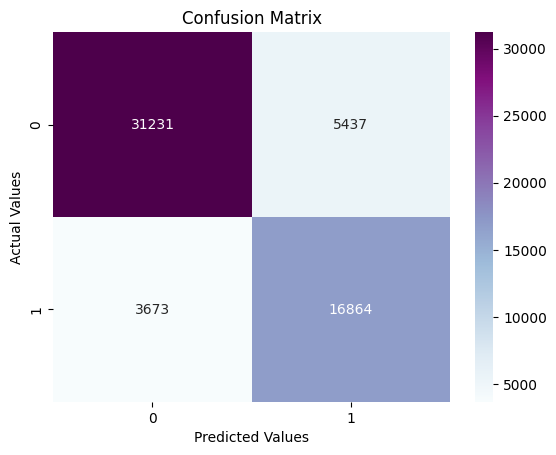

In [36]:
cmatrix = confusion_matrix(Y_test, lstm_pred)

print(cmatrix)

sns.heatmap(cmatrix,fmt='d',cmap='BuPu',annot=True)

plt.xlabel('Predicted Values')

plt.ylabel('Actual Values')

plt.title('Confusion Matrix')

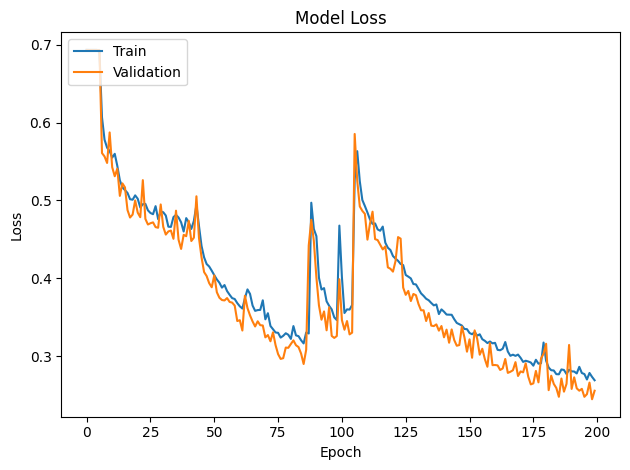

In [37]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

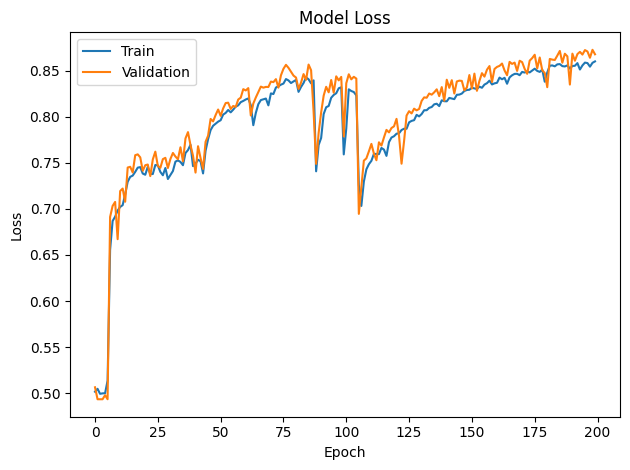

In [38]:
# Plot training & validation loss values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [39]:
LSTM_model.save('../Modelos/V1/LSTM_V1')

INFO:tensorflow:Assets written to: ../Modelos/V1/LSTM_V1/assets


INFO:tensorflow:Assets written to: ../Modelos/V1/LSTM_V1/assets


In [40]:
with open('../Modelos/LSTM_history.json', 'w') as json_file:
    json.dump(history.history, json_file)